In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score

In [2]:
data = pd.read_csv('F:\Kuliah\Semester 7\Data Mining\Data Dow Jones\creditcard.csv', sep=',')
#data diambil dari kaggle.com/mlg-ulb/creditcardfraud

data2 = data

print (data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
print (data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [4]:
data.shape

(284807, 31)

In [5]:
# data.describe(include='all')
pd.options.display.float_format = "{:.6f}".format
data.describe(include='all')
# desc = data.describe(include='all')
# desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
# desc.iloc[1:] = desc.iloc[1:].applymap('{:.20f}'.format)
# print (desc)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [6]:
##memeriksa persentase data transaksi yang termasuk non fraud dan fraud pada dataset
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

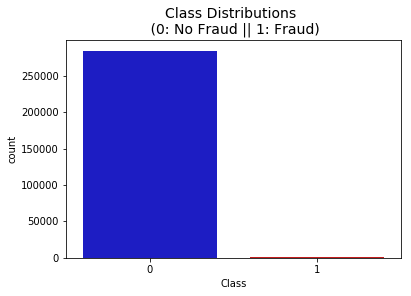

In [30]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [7]:
data.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [8]:
##melakukan feature scaling
##Feature Scaling adalah suatu cara untuk membuat numerical data 
##pada dataset memiliki rentang nilai (scale) yang sama. 
##Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

##membuat sub-sample dengan data 50/50
##men-scale kolom Time dan Amount, karena kolom yang lain sudah di-scale
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler menghilangkan median dan men-scale data berdasarkan quartile range-nya
# StandardScaler menghilangkan mean dan men-scale data ke unit variance

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
#mengubah nama kolom Time Amount menjadi scaled_time dan scaled_amount
scaled_amount = data['scaled_amount']
#scaled_time = data['scaled_time']

data.drop(['scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
#data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
##Splitting Data dari Dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

X = data.drop('Class', axis=1)
y = data['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

original_Xtrain.shape

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 87247  90855  40085 ... 236247 199115 212516] Test: [172818  67471  67694 ...  29249  12061 260434]
Train: [93486  5606 21697 ... 10690 46918 57615] Test: [149951 185116 164361 ... 127957 133436 243340]
Train: [ 43768 204636 124578 ... 166081  31506 273542] Test: [ 76248 156322  15978 ...  87030 203171  20439]
Train: [104338 223911  42473 ... 139759  84543  71334] Test: [198111 275471 214589 ...  52614 125156  94648]
Train: [172229 196051 154684 ...  85496  82871  30442] Test: [218704 159743 160019 ...  39048 129315  55212]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.76004872 0.23995128]
[9.99928726e-01 7.12740594e-05]


In [11]:
#Membuat sub sample undersampling

#Karena ada 492 kasus transaksi fraud, maka akan diambil secara acak 492 kasus transaksi non-fraud

#merandom dataset
data = data.sample(frac=1)

#mengambil seluruh data fraud dan 492 kasus data non-fraud
fraud_data = data.loc[data['Class'] == 1]
nonFraud_data = data.loc[data['Class']==0][:492]

#menggabungkan data fraud dan non-fraud
normal_distributed_data = pd.concat([fraud_data, nonFraud_data])

#membuat dataframe baru yang berisi sub sample 50:50 kemudian mengacak baris pada data baru
subSample_data = normal_distributed_data.sample(frac=1, random_state=42)
# subSample_data.shape
subSample_data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
140439,-0.118214,-0.711182,1.097314,1.131105,-0.196645,0.334645,0.270969,0.438901,0.386438,-0.391879,...,0.149297,-0.194875,-0.411609,0.051068,-0.355882,-0.304957,0.120553,0.385810,0.135522,0
107637,11.218193,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,...,2.285758,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,1
167933,0.158597,1.989480,-0.246744,-1.786019,0.441728,0.295587,-0.683562,0.270467,-0.114293,0.378032,...,-0.277264,0.014439,0.022328,0.095649,0.761318,0.124263,0.327339,-0.110005,-0.076049,0
6734,-0.293440,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,...,0.562706,0.743314,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,1
140786,-0.293440,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,-2.743539,...,0.745029,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1


In [12]:
#Undersampling sebelum melakukan cross-validation

X = subSample_data.drop('Class', axis=1)
y = subSample_data['Class']
#X --> variabel label untuk prediksi
#y --> variabel feature, semua kolom kecuali X (Class)

#Memecah dataframe baru menjadi training dan test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#test_size = perbandingan pembagian training test dengan testing set
#total data = 984
#training set = 787
#testing set = 197

#mengubah ke array agar lebih mudah untuk algoritma klasifikasi
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape

In [13]:
#Menerapkan algoritma klasifikasi Logistic Regression

classifiers = {"LogReg" : LogisticRegression()}

from sklearn.model_selection import cross_val_score

t0 = time.time()
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train,
                                    cv=5)
#     print("Classifiers: ", classifier.__class__.__name__, "training skor akurasinya", round(training_score.mean(),2)*100,
 #        "%")
t1 = time.time()

print ('Training logistic regression untuk under sampling memakan waktu: {:3f} detik' .format(t1-t0))

Training logistic regression untuk under sampling memakan waktu: 0.058038 detik


C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

In [14]:
from sklearn.model_selection import GridSearchCV

# t0 = time.time()
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                  'solver' : ['liblinear','saga'], 'max_iter' : [100], 'multi_class' : ['ovr'],
                 'class_weight' : ['balanced']}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print (log_reg)

# log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
# print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
# t1 = time.time()
# print ('Cross Validation pada Logistic Regression untuk sub sample 50:50 memakan waktu: {:3f} detik' .format(t1-t0))

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-pac

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)


C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [15]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
# Create a DataFrame with all the scores and the classifiers names.
#t0 = time.time()
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")
#print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
#t1 = time.time()

#print ('Menghitung skor AUC Logistic Regression untuk under sampling memakan waktu: {:3f} detik' .format(t1-t0))

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The ma

In [16]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# t0= time.time()
y_pred = log_reg.predict(X_train)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))

# t1= time.time()
# print ('Menghitung recall, precision, f1, dan akurasi pada Logistic Regression untuk down sampling memerlukan waktu: {:3f} detik' .format(t1-t0))

Classification Report Logistic Regression:
Recall Score: 0.93
Precision Score: 0.99
F1 Score: 0.96
Accuracy Score: 0.96


In [17]:
#mengambil seluruh data fraud dan non-fraud
fraud_data_all = data2.loc[data2['Class'] == 1]
nonFraud_data_all = data2.loc[data2['Class']==0]

#menggabungkan data fraud dan non-fraud
normal_distributed_data_all = pd.concat([fraud_data_all, nonFraud_data_all])
normal_distributed_data_all.shape
#normal_distributed_data_all.head()
# data2.head()
#fraud_data_all.shape

(284807, 30)

In [18]:
X2 = normal_distributed_data_all.drop('Class', axis=1)
y2 = normal_distributed_data_all['Class']
#X2 --> variabel label untuk prediksi
#y2 --> variabel feature, semua kolom kecuali X (Class)

#Memecah dataframe baru menjadi training dan test set
# from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=42)

#mengubah ke array agar lebih mudah untuk algoritma klasifikasi
X_train2 = X_train2.values
X_test2 = X_test2.values
y_train2 = y_train2.values
y_test2 = y_test2.values

#y_train2.shape
#y_test2.shape


In [19]:
t0 = time.time()
for key, classifier in classifiers.items():
    classifier.fit(X_train2, y_train2)
    training_score = cross_val_score(classifier, X_train2, y_train2,
                                    cv=5)
#     print("Classifiers: ", classifier.__class__.__name__, "training skor akurasinya", round(training_score.mean(),2)*100,
    #     "%")
t1 = time.time()

print ('Training logistic regression untuk seluruh data memakan waktu: {:3f} detik' .format(t1-t0))

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

Training logistic regression untuk seluruh data memakan waktu: 43.199663 detik


In [20]:
# t0 = time.time()
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' : ['liblinear','saga']}



grid_log_reg2 = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg2.fit(X_train2, y_train2)
# We automatically get the logistic regression with the best parameters.
log_reg2 = grid_log_reg2.best_estimator_

print (log_reg2)
# log_reg_score2 = cross_val_score(log_reg2, X_train2, y_train2, cv=5)
# print('Logistic Regression Cross Validation Score: ', round(log_reg_score2.mean() * 100, 2).astype(str) + '%')
# t1 = time.time()
# print ('Cross Validation pada Logistic Regression untuk seluruh data memakan waktu: {:3f} detik' .format(t1-t0))

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-pac

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The ma

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [21]:
#t0 = time.time()
log_reg_pred2 = cross_val_predict(log_reg2, X_train2, y_train2, cv=5,
                             method="decision_function")
#print('Logistic Regression: ', roc_auc_score(y_train2, log_reg_pred2))
#t1 = time.time()

#print ('Menghitung skor AUC Logistic Regression untuk seluruh data memakan waktu: {:3f} detik' .format(t1-t0))

In [22]:
# t0= time.time()
y_pred2 = log_reg2.predict(X_train2)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_train2, y_pred2)))
print('Precision Score: {:.2f}'.format(precision_score(y_train2, y_pred2)))
print('F1 Score: {:.2f}'.format(f1_score(y_train2, y_pred2)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train2, y_pred2)))

# t1= time.time()
# print ('Menghitung recall, precision, f1, dan akurasi pada Logistic Regression untuk seluruh data memerlukan waktu: {:3f} detik' .format(t1-t0))

Classification Report Logistic Regression:
Recall Score: 0.60
Precision Score: 0.87
F1 Score: 0.71
Accuracy Score: 1.00


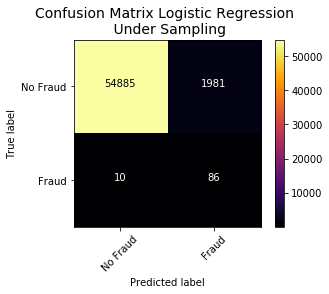

In [23]:
from sklearn.metrics import confusion_matrix

#Menerapkan confusion matrix pada testing set
y_pred_log_reg = log_reg.predict(X_test2)


#log
#mengganti testing setnya dengan testing set untuk data keseluruhan
log_reg_cf = confusion_matrix(y_test2, y_pred_log_reg)

# fig, ax = plt.subplots(figsize=(5,4))
# #classNames = ['Positive', 'Negative']
# sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.inferno)
# plt.title("Confusion Matrix dengan Logistic Regression \n Pada Data Down Sampling", fontsize=14)
# #tick_marks = np.arrange(len(classNames))
# plt.xlabel('Predicted', fontsize=19)
# plt.ylabel('Actual', fontsize=19)

# # s = [['TN','FP'], ['FN', 'TP']]
# # for i in range(2):
# #     for j in range(2):
# #         plt.text(j,i, str(s[i][j])+" = "+str(log_reg_cf[i][j]))

# #TN = kiri atas -->Non Fraud
# #FP = kanan atas
# #FN = kiri bawah
# #TP = kanan bawah -->Fraud

# ax.set_xticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)
# ax.set_yticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)

# plt.show()
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(log_reg_cf, labels, title="Confusion Matrix Logistic Regression \n Under Sampling", cmap=plt.cm.inferno)



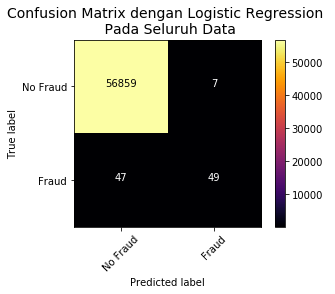

In [24]:
y_pred_log_reg2 = log_reg2.predict(X_test2)

log_reg_cf2 = confusion_matrix(y_test2, y_pred_log_reg2)

# fig, ax = plt.subplots(figsize=(5,4))
# #classNames = ['Positive', 'Negative']
# sns.heatmap(log_reg_cf2, annot=True, cmap=plt.cm.inferno)
# plt.title("Confusion Matrix dengan Logistic Regression \n Pada Seluruh Data", fontsize=14)
# #tick_marks = np.arrange(len(classNames))
# plt.xlabel('Predicted', fontsize=19)
# plt.ylabel('Actual', fontsize=19)

# #TN = kiri atas -->Non Fraud
# #FP = kanan atas
# #FN = kiri bawah
# #TP = kanan bawah -->Fraud

# ax.set_xticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)
# ax.set_yticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)
fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(log_reg_cf2, labels, title="Confusion Matrix dengan Logistic Regression \n Pada Seluruh Data", 
                      cmap=plt.cm.inferno)

plt.show()

In [25]:
#Laporan Hasil Klasifikasi

print('Logistic Regression dengan Down Sampling:')
print(classification_report(y_test2, y_pred_log_reg))


print('Logistic Regression dengan Seluruh Data:')
print(classification_report(y_test2, y_pred_log_reg2))

Logistic Regression dengan Down Sampling:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.90      0.08        96

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Logistic Regression dengan Seluruh Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.51      0.64        96

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
G_mean_under_sampling = geometric_mean_score (y_test2, y_pred_log_reg)
G_mean_all_data = geometric_mean_score (y_test2, y_pred_log_reg2)

print ("Geometrcial mean under sampling: ", G_mean_under_sampling)
print ("Geometrical mean seluruh data: ", G_mean_all_data)

Geometrcial mean under sampling:  0.9298525855751082
Geometrical mean seluruh data:  0.7143905347997301


In [27]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches

def plot_dim (x,y):
    #implementasi T-SNE
    X_reduced_tsne = TSNE (n_components=2, random_state=10).fit_transform(x)
    
    #impelemntasi PCA
    X_reduced_pca = PCA (n_components=2, random_state=10).fit_transform(x)
    
    #implementasi Truncatedd SVD
    X_reduced_svd = TruncatedSVD (n_components=2, algorithm='randomized', random_state=2).fit_transform(x)
    
    #membuat gambar
    f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24,6))
    f.suptitle ('Clusters using Dimensionality Reduction', fontsize=14)
    
    blue_patch = mpatches.Patch (color='#0A0AFF', label ='No Fraud')
    red_patch = mpatches.Patch (color ='#AF0000', label ='Fraud')
    
    #scatter plot t-SNE
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='No Fraud', linewidths=2)
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='Fraud', linewidths=2)
    ax1.set_title('t-SNE', fontsize=14)

    ax1.grid(True)

    ax1.legend(handles=[blue_patch, red_patch])


    # scatter plot PCA
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='No Fraud', linewidths=2)
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='Fraud', linewidths=2)
    ax2.set_title('PCA', fontsize=14)

    ax2.grid(True)

    ax2.legend(handles=[blue_patch, red_patch])

    # scatter plot Truncated SVD
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='No Fraud', linewidths=2)
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='Fraud', linewidths=2)
    ax3.set_title('Truncated SVD', fontsize=14)

    ax3.grid(True)

    ax3.legend(handles=[blue_patch, red_patch])

    plt.show()

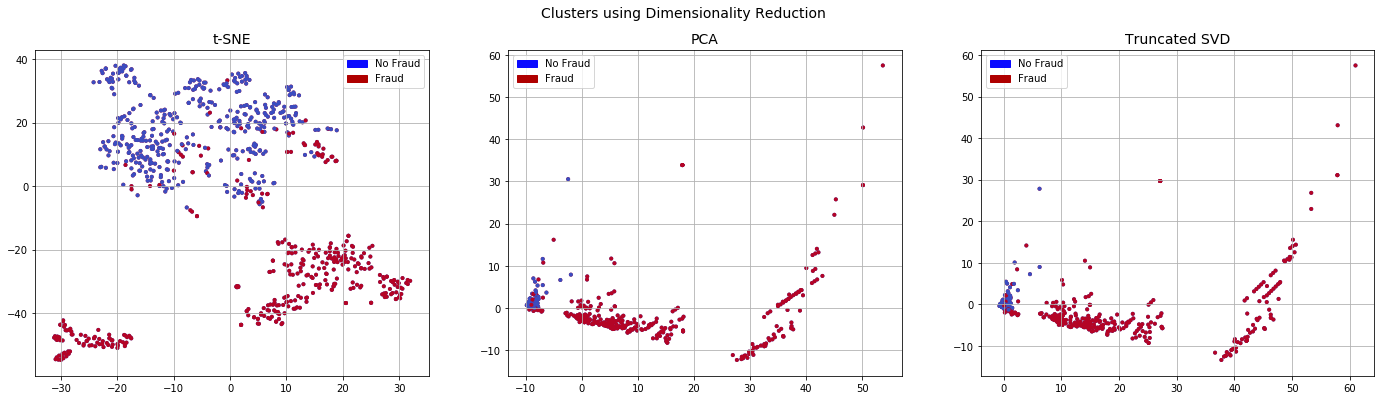

In [28]:
plot_dim (X_train,y_train)

In [29]:
plot_dim (X_train2, y_train2)

MemoryError: 